# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [158]:
df = pd.read_csv("data/temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [160]:
df.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

Quito el feature 'year' dado que no aporta nada:

In [161]:
df.drop(['year'], axis=1, inplace=True)

También considero eliminar la columna de predicción del amigo, pues se trata de un número escogido al azar, por lo que aportará ruido:

In [162]:
df.drop(['friend'], axis=1, inplace=True)

### 2. Realiza un análisis exploratorio junto con un Feature Engineering

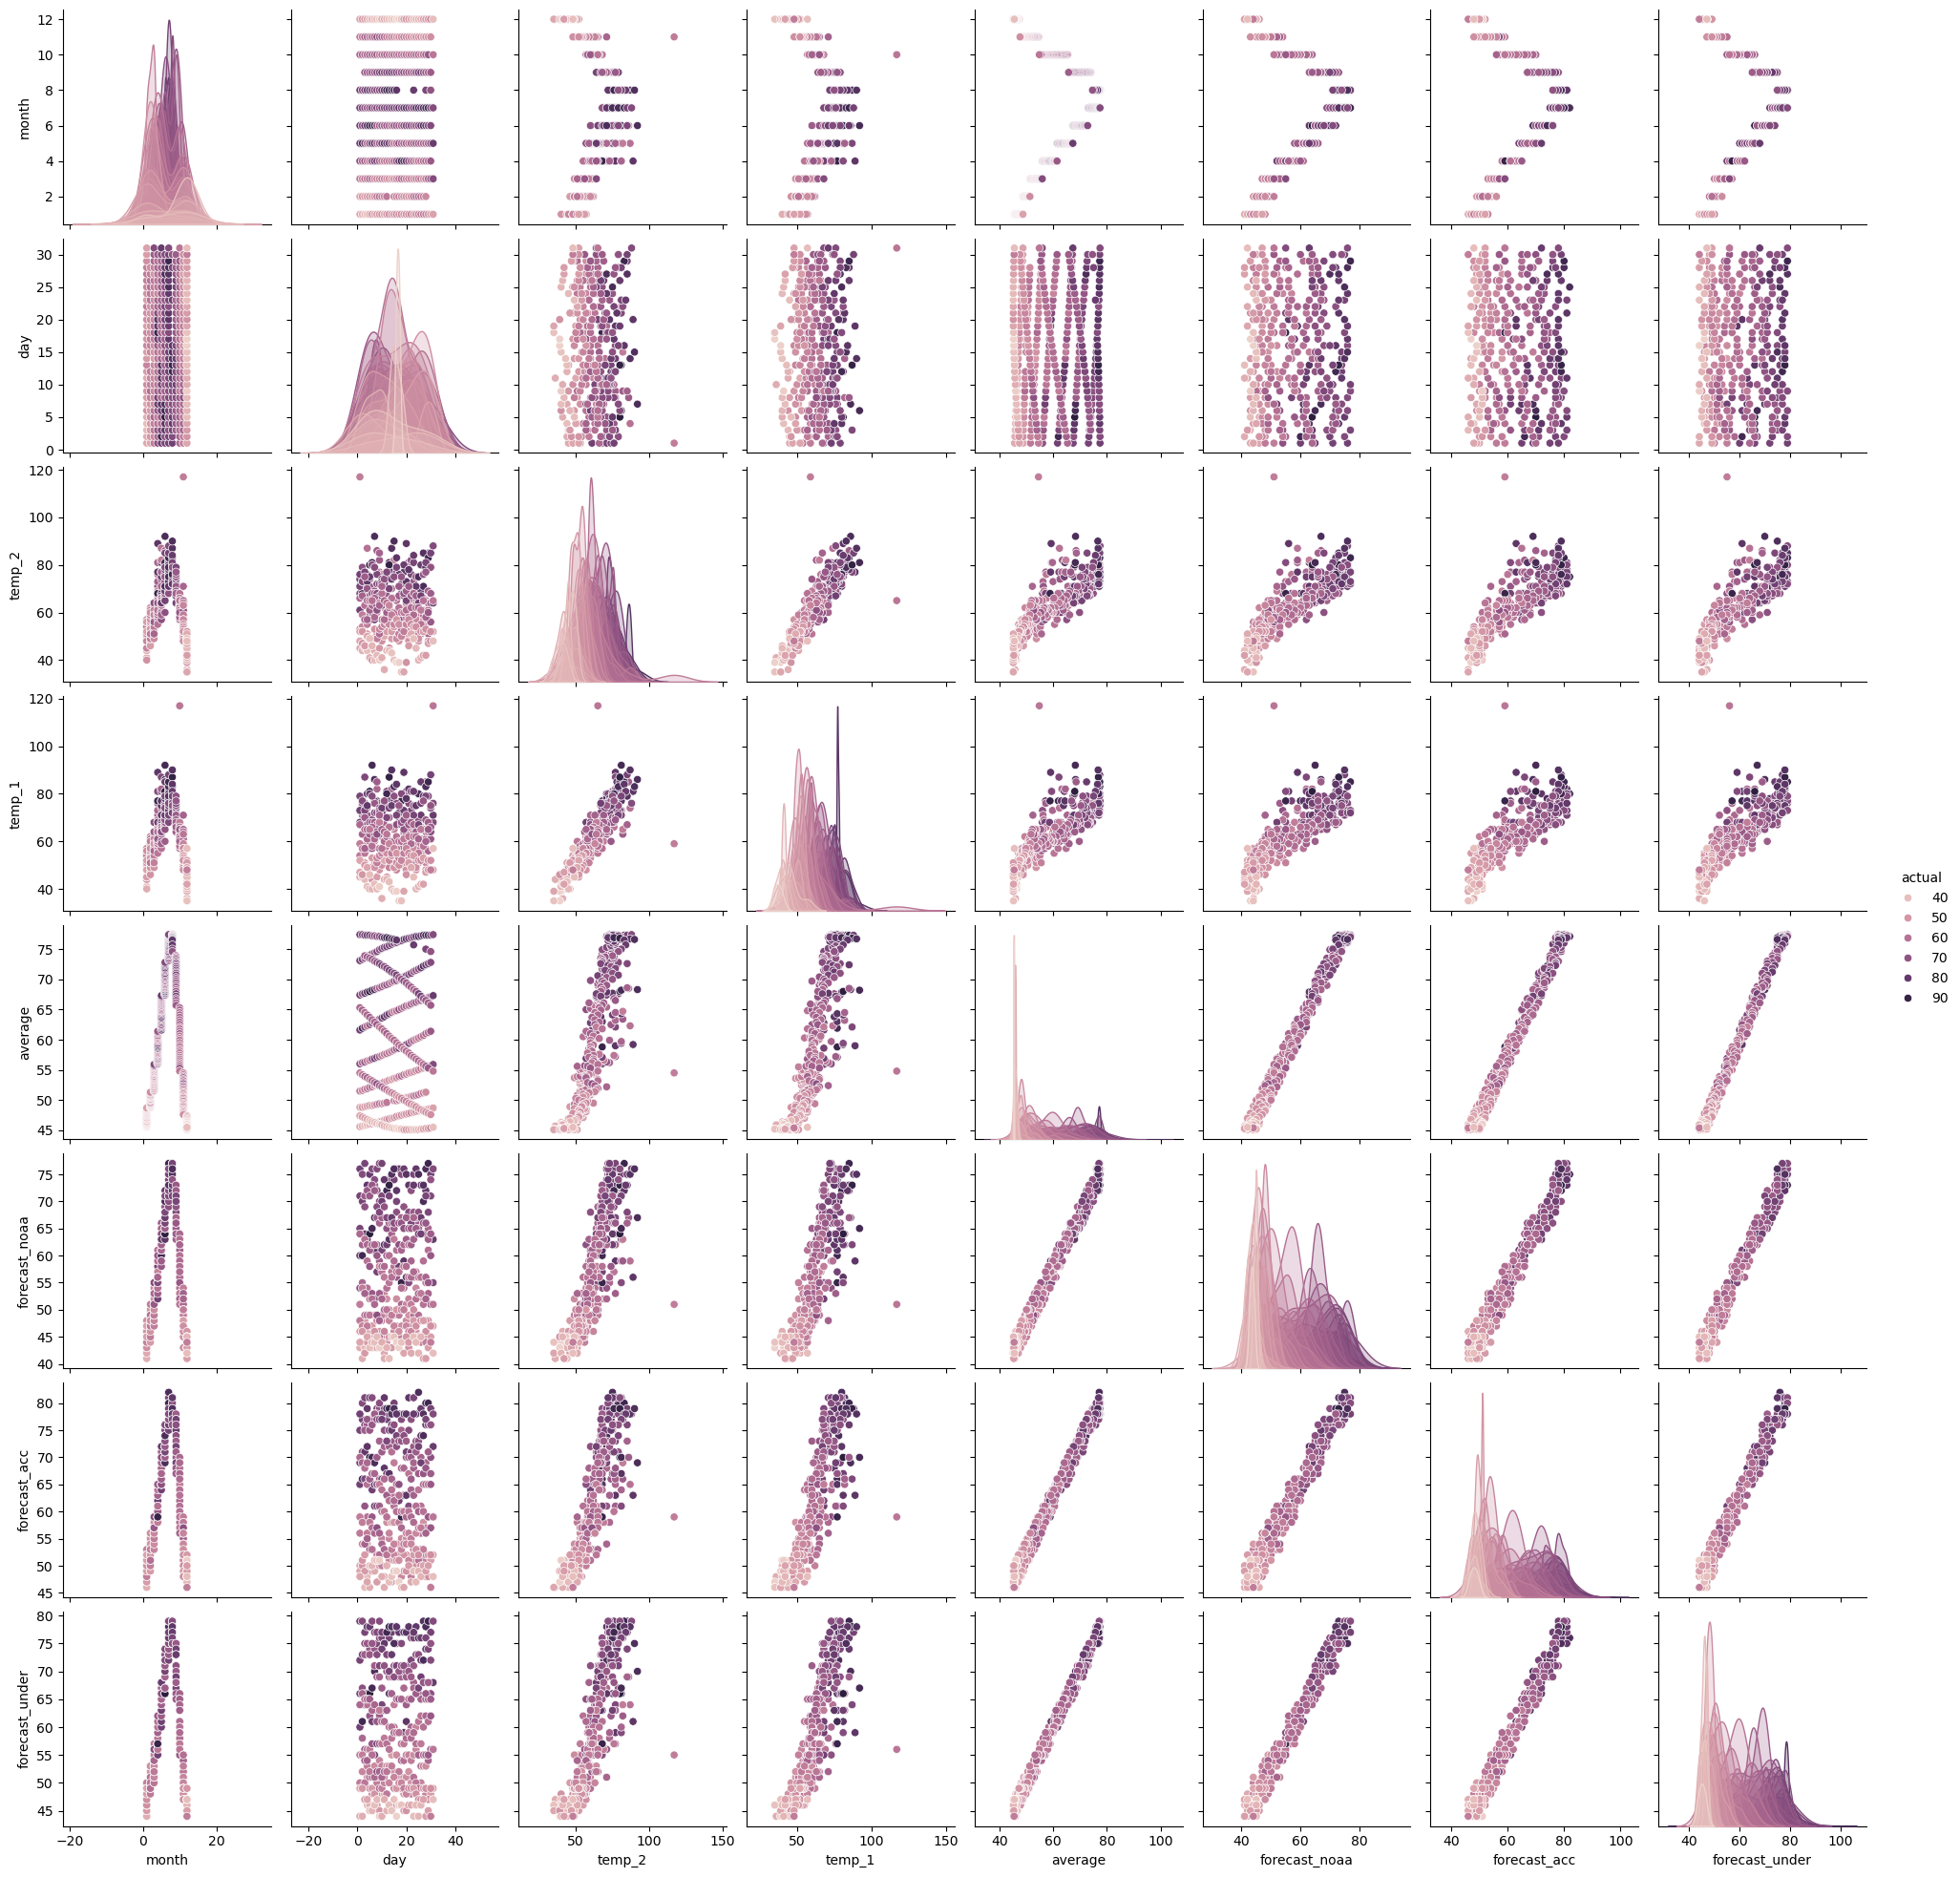

In [8]:
sns.pairplot(df, diag_kind='kde', hue='actual')

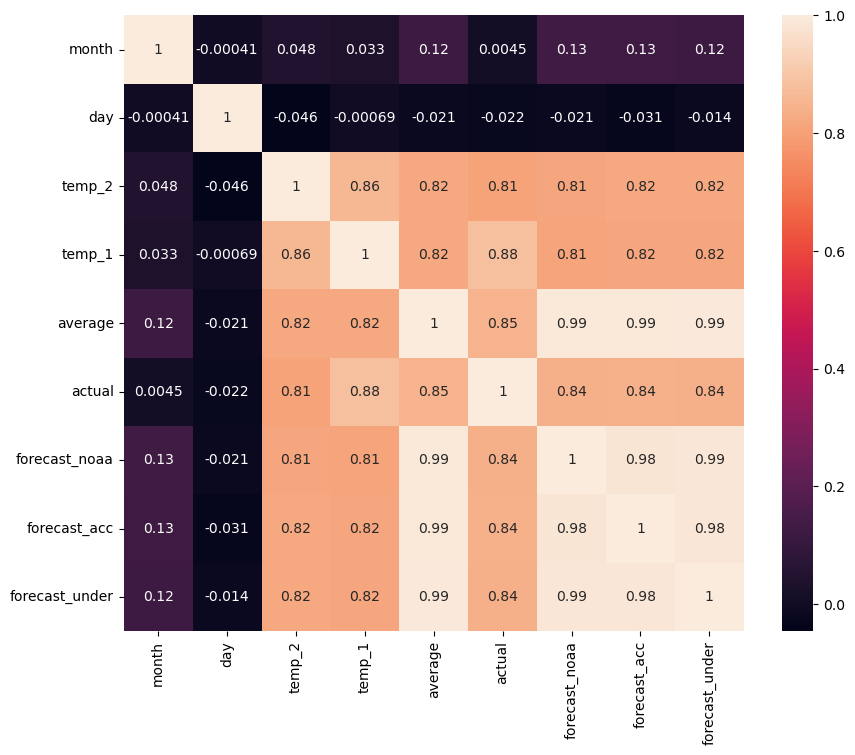

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [163]:
X = df.drop('actual',axis=1)
y = df['actual']

In [164]:
from sklearn.preprocessing import OrdinalEncoder

In [165]:
def encode(df):
    ordinalencoder = OrdinalEncoder()
    data = ordinalencoder.fit_transform(df).astype(int)

    return pd.DataFrame(data, columns=df.columns)

In [166]:
X_objs = X.select_dtypes(include='object')
		
X_nums = X.select_dtypes(exclude='object')  

In [167]:
encoded_X_objs = encode(X_objs)
encoded_X_objs.head()

,week
0,0
1,2
2,3
3,1
4,5


In [169]:
X = pd.concat([X_nums, encoded_X_objs], axis=1)
X.head()

,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,week
0,1,1,45,45,45.6,43,50,44,0
1,1,2,44,45,45.7,41,50,44,2
2,1,3,45,44,45.8,43,46,47,3
3,1,4,44,41,45.9,44,48,46,1
4,1,5,41,40,46.0,46,46,46,5


### 3. Selecciona variables y divide en train y test

In [170]:
from sklearn.model_selection import train_test_split
		
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 4. Entrena el modelo


In [171]:
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor()

base_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [172]:
base_pred = base_model.predict(X_test)
base_pred

array([82., 50., 65., 51., 51., 49., 70., 77., 75., 64., 77., 47., 80.,
       82., 67., 66., 63., 45., 75., 85., 67., 90., 44., 60., 49., 52.,
       50., 48., 77., 71., 66., 71., 89., 65., 75., 54., 74., 89., 58.,
       76., 63., 64., 40., 81., 50., 57., 60., 56., 58., 82., 68., 52.,
       45., 43., 52., 58., 48., 59., 55., 89., 63., 56., 75., 40., 60.,
       63., 42., 65., 58., 49., 75., 67., 78., 51., 68., 76., 82., 77.,
       70., 53., 58., 47., 59., 48., 71., 73., 80., 71., 71., 71., 60.,
       59., 59., 44., 76., 59., 64., 73., 78., 74., 79., 60., 79., 61.,
       73.])

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [173]:
MODELS = []
R2_SCORE = []
MAE = []
MSE = []
RMSE = []

In [175]:
def calculate_errors(model, name):
	from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
	
	test_predictions = model.predict(X_test)
	
	LINEAR_R2_SCORE = r2_score(y_test, test_predictions)
	LINEAR_MAE = mean_absolute_error(y_test, test_predictions)
	LINEAR_MAPE = mean_absolute_percentage_error(y_test, test_predictions)
	LINEAR_MSE = mean_squared_error(y_test, test_predictions)
	LINEAR_RMSE = np.sqrt(LINEAR_MSE)
	
	MODELS.append(name)
	R2_SCORE.append(LINEAR_R2_SCORE)
	MAE.append(LINEAR_MAE)
	MSE.append(LINEAR_MSE)
	RMSE.append(LINEAR_RMSE)
	
	print(f"R2: {LINEAR_R2_SCORE}")
	print(f"MAE: {LINEAR_MAE}")
	print(f"MAPE: {LINEAR_MAPE}")
	print(f"MSE: {LINEAR_MSE}")
	print(f"RMSE: {LINEAR_RMSE}")
	print(f"\nMedia de las temperaturas máximas: {y.mean()}")

In [176]:
calculate_errors(base_model, "Base Model")

R2: 0.6740088390783029
MAE: 4.9714285714285715
MAPE: 0.07944349290064438
MSE: 45.695238095238096
RMSE: 6.75982530064484

Media de las temperaturas máximas: 62.543103448275865


### 6. Representa el árbol de decisión

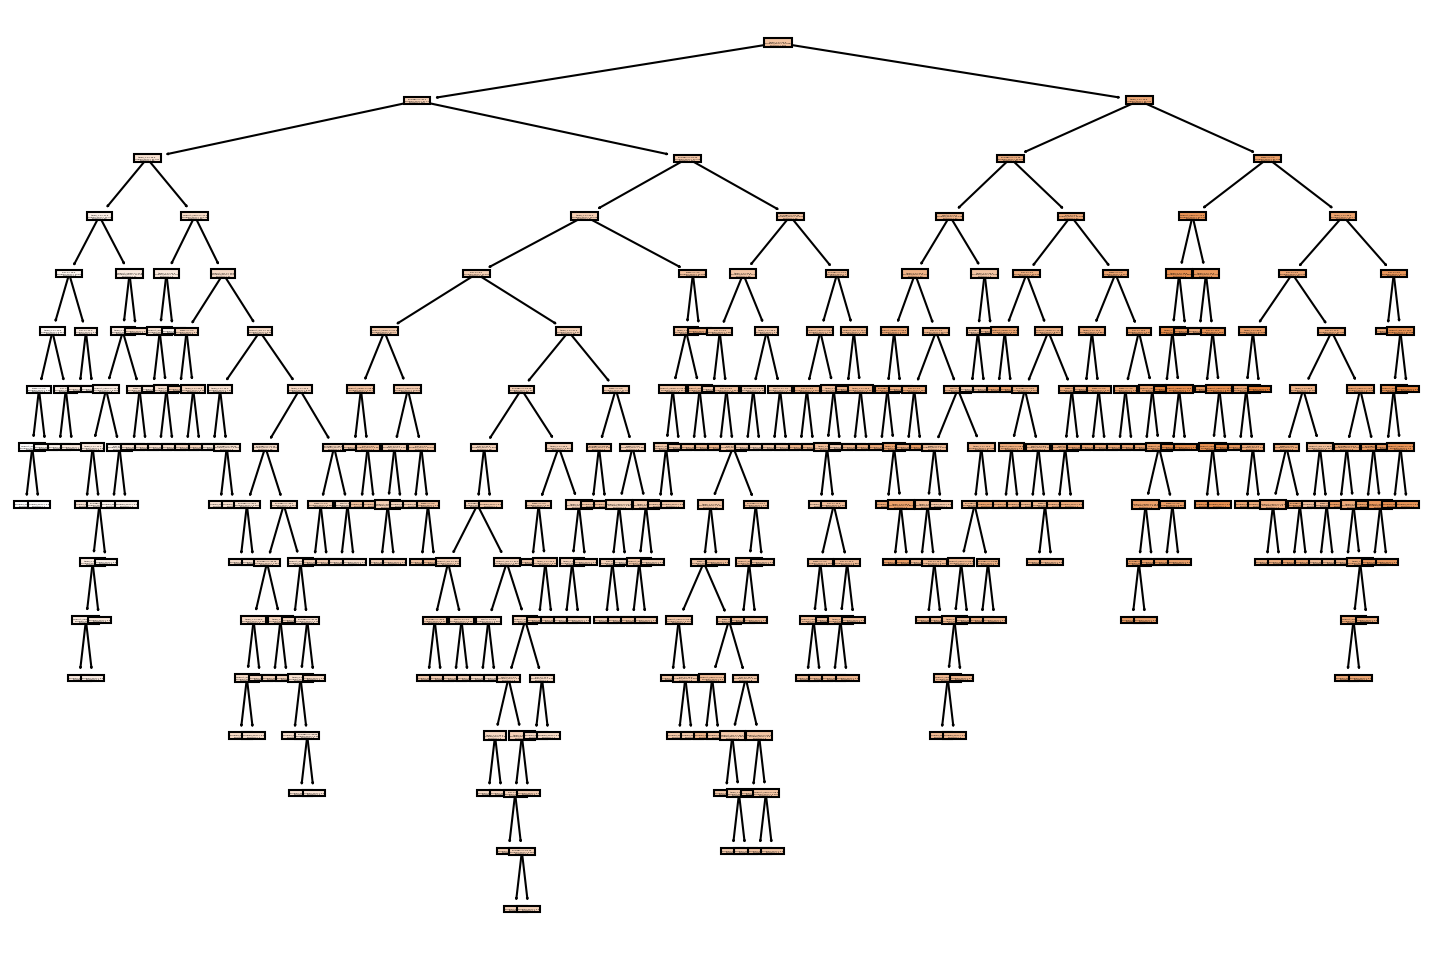

In [177]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=150)
plot_tree(base_model, filled=True, feature_names=X.columns);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [178]:
from sklearn.tree import DecisionTreeRegressor

max_depth_model = DecisionTreeRegressor(max_depth=3)

max_depth_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [179]:
max_depth_model_pred = max_depth_model.predict(X_test)
max_depth_model_pred

array([83.55555556, 57.11764706, 62.73469388, 50.51428571, 57.11764706,
       50.51428571, 76.64      , 69.        , 76.64      , 62.73469388,
       69.        , 50.51428571, 74.        , 76.64      , 69.        ,
       62.73469388, 57.11764706, 50.51428571, 74.        , 83.55555556,
       76.64      , 76.64      , 42.3       , 62.73469388, 50.51428571,
       50.51428571, 50.51428571, 50.51428571, 69.        , 69.        ,
       62.73469388, 74.        , 83.55555556, 57.11764706, 74.        ,
       57.11764706, 74.        , 83.55555556, 62.73469388, 74.        ,
       62.73469388, 62.73469388, 42.3       , 76.64      , 50.51428571,
       62.73469388, 57.11764706, 57.11764706, 57.11764706, 83.55555556,
       74.        , 50.51428571, 50.51428571, 42.3       , 50.51428571,
       62.73469388, 50.51428571, 62.73469388, 57.11764706, 83.55555556,
       62.73469388, 50.51428571, 74.        , 42.3       , 69.        ,
       62.73469388, 42.3       , 57.11764706, 57.11764706, 50.51

### 8. Vuelve a evaluar tu modelo

In [180]:
calculate_errors(max_depth_model, "Max Depth Model")

R2: 0.8003444698950466
MAE: 4.010272629686796
MAPE: 0.06397993077814186
MSE: 27.98636306389987
RMSE: 5.290213895855239

Media de las temperaturas máximas: 62.543103448275865


### 9. Vuelve a representar su árbol

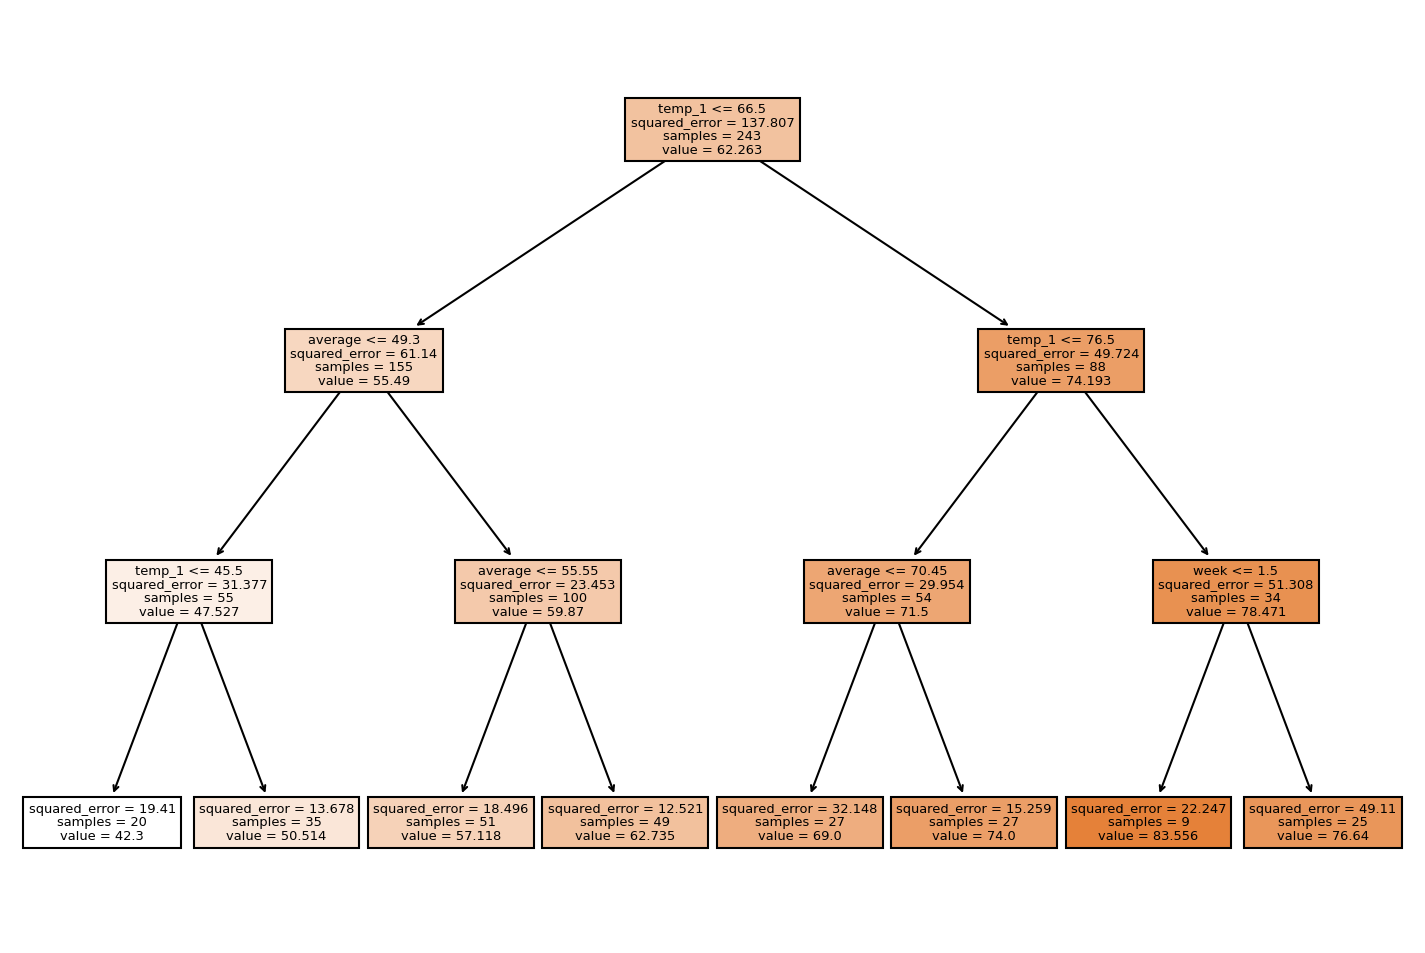

In [181]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=150)
plot_tree(max_depth_model, filled=True, feature_names=X.columns);

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [182]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
	"min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 15]
}

In [183]:
from sklearn.model_selection import GridSearchCV

cv_model = DecisionTreeRegressor()

grid_model = GridSearchCV(estimator=cv_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, min_samples_

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=2)

In [184]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=15)

In [185]:
grid_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2}

Como el min_samples_leaf óptimo resulta ser el mayor de los que he comprobado, vuelvo a ejecutar el GridSearch con valores superiores:

In [186]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
	"min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [15, 20, 25]
}

In [187]:
from sklearn.model_selection import GridSearchCV

cv_model = DecisionTreeRegressor()

grid_model = GridSearchCV(estimator=cv_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, mi

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=2)

In [188]:
grid_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2}

Confirmo que 15 es el mejor valor.

In [189]:
y_pred = grid_model.predict(X_test)

In [190]:
calculate_errors(grid_model, "Grid Search Model")

R2: 0.8261354466985655
MAE: 3.819114593205703
MAPE: 0.060654987878012795
MSE: 24.37115821474556
RMSE: 4.936715326484358

Media de las temperaturas máximas: 62.543103448275865


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [191]:
pd.DataFrame(index=X.columns, data=grid_model.best_estimator_.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

,Feature Importance
temp_1,0.750467
average,0.236546
day,0.007667
forecast_noaa,0.005320
month,0.000000
temp_2,0.000000
forecast_acc,0.000000
forecast_under,0.000000
week,0.000000


In [194]:
pd.DataFrame(
    {
        'Model': MODELS,
        'R2': R2_SCORE,
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
    }
).set_index('Model').sort_values('MSE', ascending=True)

,R2,MAE,MSE,RMSE
Model,,,,
Grid Search Model,0.826135,3.819115,24.371158,4.936715
Max Depth Model,0.800344,4.010273,27.986363,5.290214
Base Model,0.674009,4.971429,45.695238,6.759825


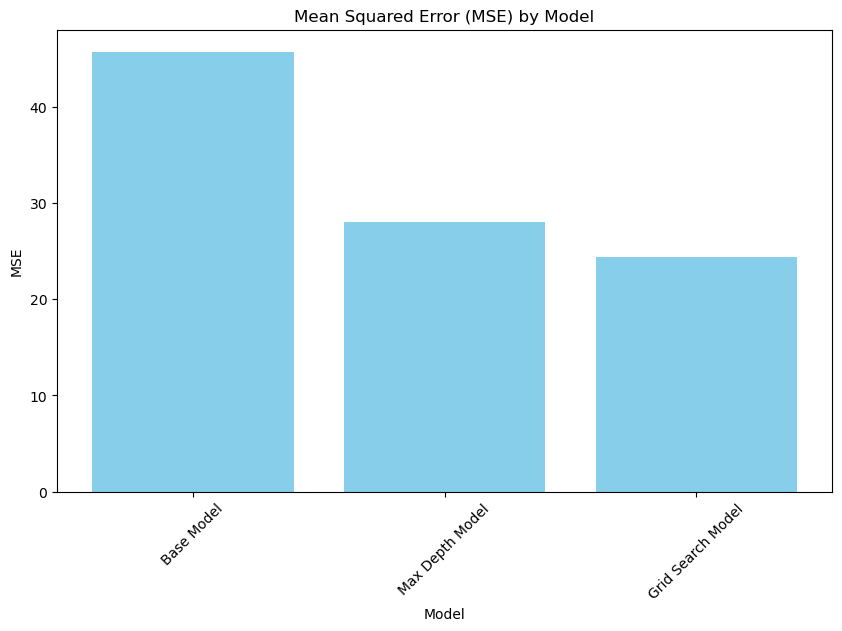

In [196]:
plt.figure(figsize=(10, 6))
plt.bar(MODELS, MSE, color='skyblue')
plt.title('Mean Squared Error (MSE) by Model')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

Creo una nueva columna target con 0 si la temperatura es menor que 15 (59 Farenheit) y 1 si es mayor:

In [124]:
df.head()

,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under
0,1,1,Fri,45,45,45.6,45,43,50,44
1,1,2,Sat,44,45,45.7,44,41,50,44
2,1,3,Sun,45,44,45.8,41,43,46,47
3,1,4,Mon,44,41,45.9,40,44,48,46
4,1,5,Tues,41,40,46.0,44,46,46,46


In [125]:
df['above 15'] = df['actual'] > 59
df['above 15'].replace({True: 1, False: 0}, inplace=True)
df.head()

C:\Users\defco\AppData\Local\Temp\ipykernel_4704\4119045072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['above 15'].replace({True: 1, False: 0}, inplace=True)
C:\Users\defco\AppData\Local\Temp\ipykernel_4704\4119045072.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['above 15'].rep

,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,above 15
0,1,1,Fri,45,45,45.6,45,43,50,44,0
1,1,2,Sat,44,45,45.7,44,41,50,44,0
2,1,3,Sun,45,44,45.8,41,43,46,47,0
3,1,4,Mon,44,41,45.9,40,44,48,46,0
4,1,5,Tues,41,40,46.0,44,46,46,46,0


Elimino el feature 'actual':

In [126]:
df.drop(['actual'], axis=1, inplace=True)

In [127]:
X = df.drop('above 15',axis=1)
y = df['above 15']

In [128]:
X_objs = X.select_dtypes(include='object')
		
X_nums = X.select_dtypes(exclude='object')  

In [129]:
encoded_X_objs = encode(X_objs)
encoded_X_objs.head()

,week
0,0
1,2
2,3
3,1
4,5


In [130]:
X = pd.concat([X_nums, encoded_X_objs], axis=1)
X.head()

,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,week
0,1,1,45,45,45.6,43,50,44,0
1,1,2,44,45,45.7,41,50,44,2
2,1,3,45,44,45.8,43,46,47,3
3,1,4,44,41,45.9,44,48,46,1
4,1,5,41,40,46.0,46,46,46,5


In [131]:
from sklearn.model_selection import train_test_split
		
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [132]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
	"min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 15]
}

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

cv_model = DecisionTreeClassifier()

grid_model = GridSearchCV(estimator=cv_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, min_samples_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=2)

In [134]:
grid_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
y_pred = grid_model.predict(X_test)

In [148]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

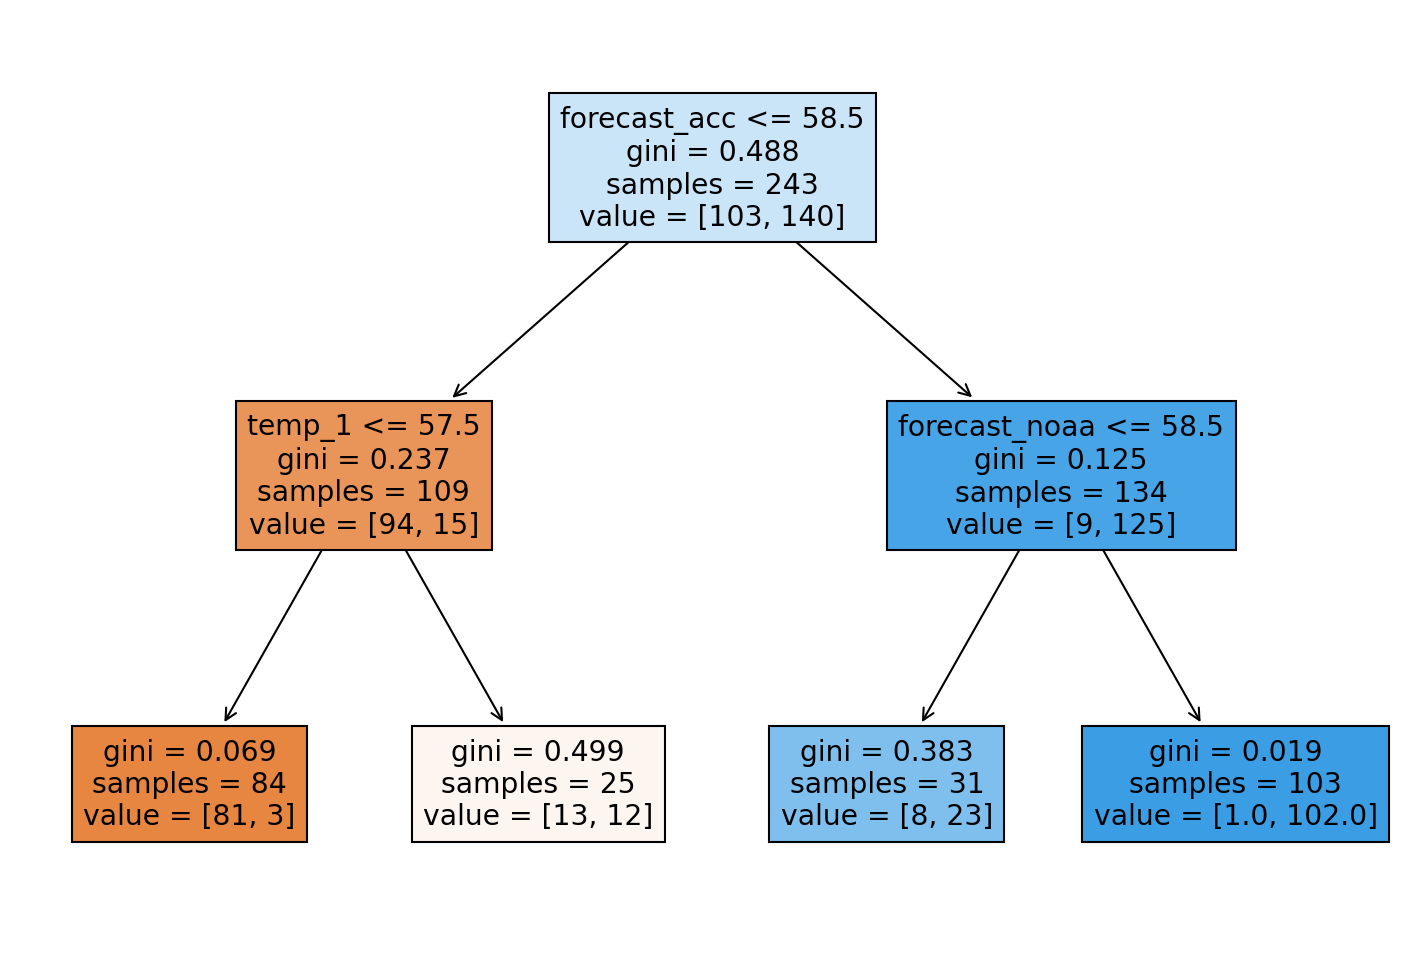

In [146]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=150)
plot_tree(grid_model.best_estimator_, filled=True, feature_names=X.columns);

**1. Confusion Matrix**

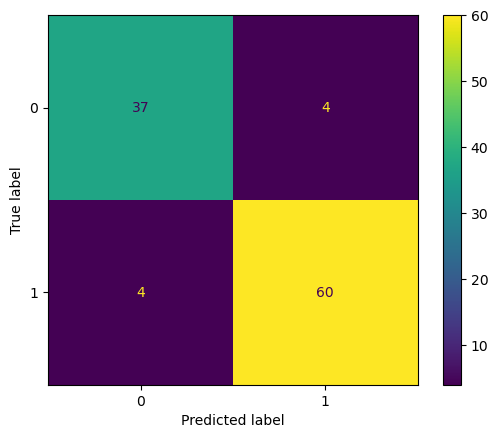

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot();

**2. Precision**

In [138]:
from sklearn.metrics import precision_score
			
precision_score(y_test, y_pred)

0.9375

Una precisión muy alta, y válida pues el target está balanceado. Los positivos se han detectado con precisión.

**3. Recall**

In [139]:
from sklearn.metrics import recall_score
			
recall_score(y_test, y_pred)

0.9375

Un recall alto indica quese han detectado la mayoría de positivos reales.

**4. F1 Score**

In [140]:
from sklearn.metrics import classification_report
			
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.94      0.94      0.94        64

    accuracy                           0.92       105
   macro avg       0.92      0.92      0.92       105
weighted avg       0.92      0.92      0.92       105



**5. ROC curve**

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

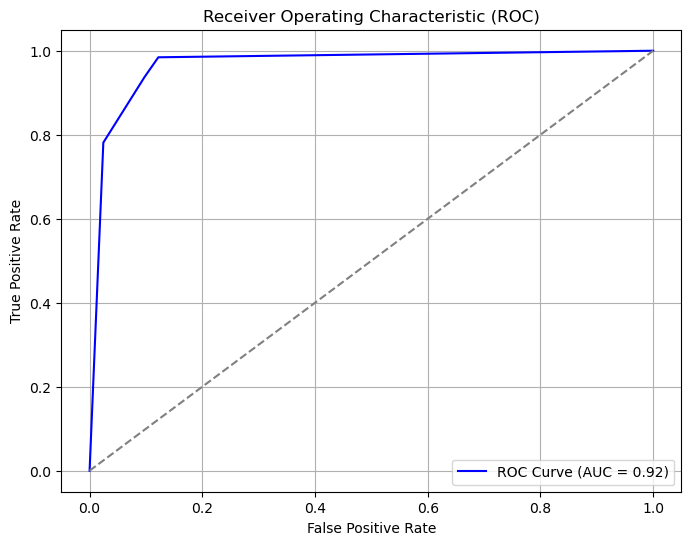

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, grid_model.predict_proba(X_test)[:, 1])

# Paso 3: Calcular el AUC (Area Under Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Paso 4: Plotear
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid()
plt.show()

Un valorde 0.92 de AUC, casi 1, por lo que muy buen resultado. Significa que se han detectado los positivos con alta precisión.

**6. P-R curve**

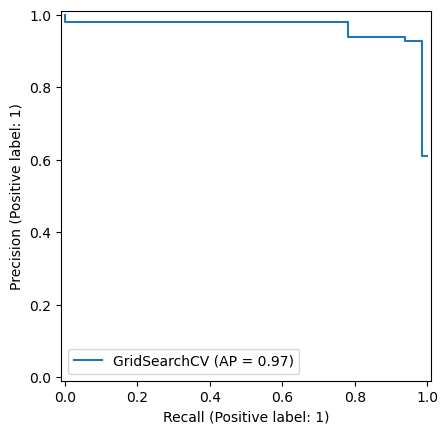

In [143]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

La curva se mantiene alta en precisión mientras el recall sube y el Average Precision es igual a 0.97, lo que es un buen indicativo del funcionamiento del algoritmo.